Aleternative tool for machine learning and data science
* Microsoft Azure Notebooks
* Amazon SageMaker Studio
* Gradient by Paperspace
* Kaggle Kernels
* JupyterLab

**Feature Extraction and Classification Pipeline for MNIST Dataset using HOG and GLCM**

In [ ]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops, hog
from skimage import filters
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import time


**Expriment 1:**

**Steps**
* Load MNIST dataset. https://keras.io/api/datasets/
* Reshape images for GLCM.
* Calculate GLCM features (contrast, dissimilarity, homogeneity, energy, correlation).
* Extract GLCM features for training and testing images.
* Create and train SVM classifier.
* Predict labels for the test set.
* Calculate evaluation metrics: confusion matrix, precision, recall, F1 score, accuracy.



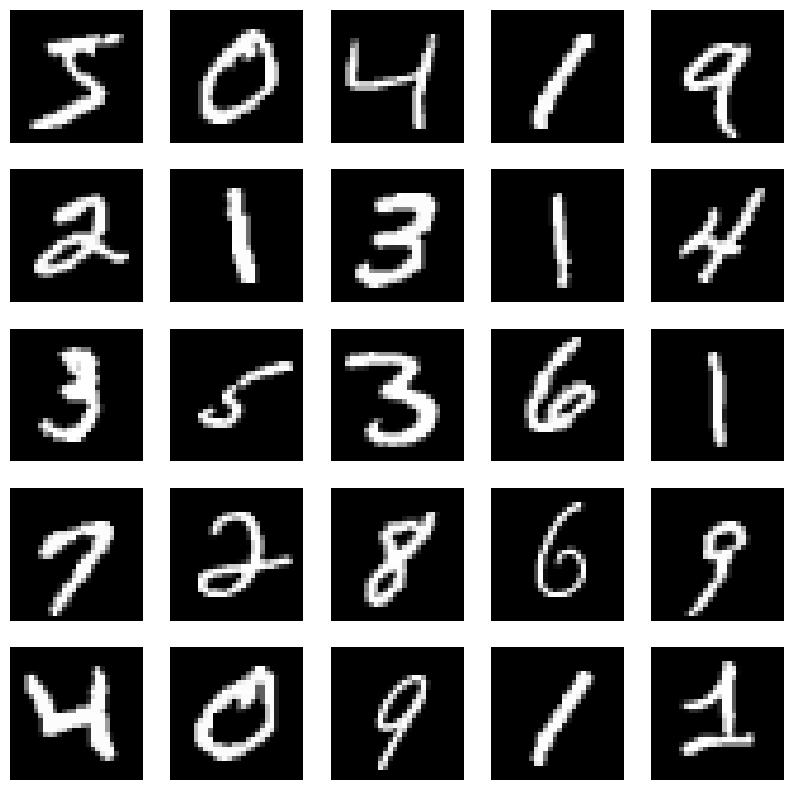

+---------+------------------+-----------------+
| Class   |   Training Count |   Testing Count |
+=========+==================+=================+
| Class 0 |             5923 |             980 |
+---------+------------------+-----------------+
| Class 1 |             6742 |            1135 |
+---------+------------------+-----------------+
| Class 2 |             5958 |            1032 |
+---------+------------------+-----------------+
| Class 3 |             6131 |            1010 |
+---------+------------------+-----------------+
| Class 4 |             5842 |             982 |
+---------+------------------+-----------------+
| Class 5 |             5421 |             892 |
+---------+------------------+-----------------+
| Class 6 |             5918 |             958 |
+---------+------------------+-----------------+
| Class 7 |             6265 |            1028 |
+---------+------------------+-----------------+
| Class 8 |             5851 |             974 |
+---------+---------

In [ ]:
from tabulate import tabulate
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Count number of images for each class in the training set
train_class_counts = {i: np.sum(y_train == i) for i in range(10)}

# Count number of images for each class in the testing set
test_class_counts = {i: np.sum(y_test == i) for i in range(10)}

# Prepare data for table
table_data = []
for i in range(10):
    table_data.append([f"Class {i}", train_class_counts[i], test_class_counts[i]])

# Print table
print(tabulate(table_data, headers=["Class", "Training Count", "Testing Count"], tablefmt="grid"))


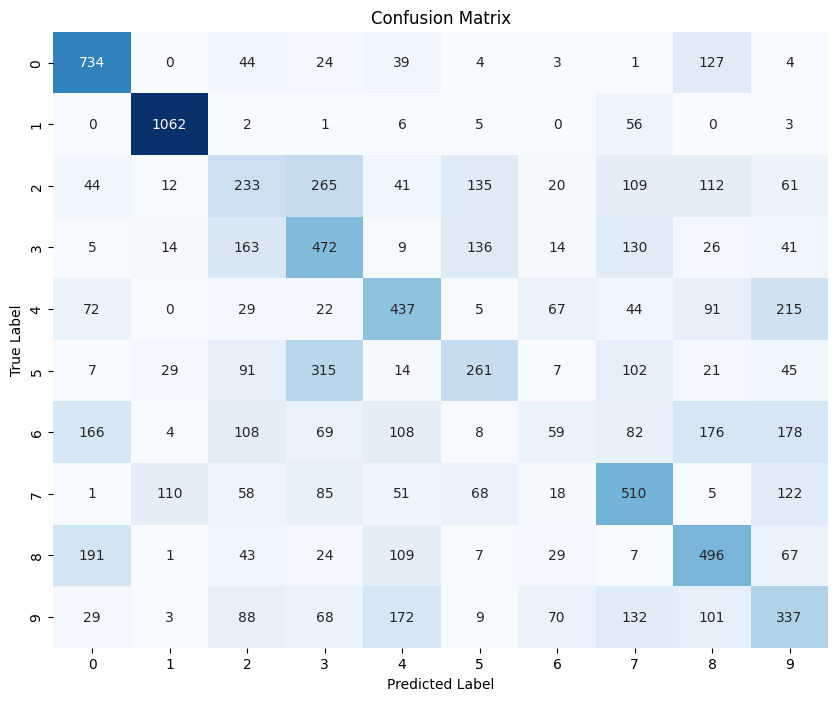

Accuracy: 0.4601
Precision: 0.4365493755845563
Recall: 0.4601
F1 Score: 0.44098971338793297
GLCM Extraction Time: 277.46067905426025 seconds
Training Time: 192.30808234214783 seconds
Prediction Time: 24.00626039505005 seconds


In [ ]:

# Reshape images to fit GLCM
x_train_reshaped = x_train.reshape(-1, 28, 28).astype(np.uint8)
x_test_reshaped = x_test.reshape(-1, 28, 28).astype(np.uint8)

# Function to calculate GLCM features
def calculate_glcm_features(images):
    glcm_features = []
    for image in images:
        glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        glcm_features.append([contrast, dissimilarity, homogeneity, energy, correlation])
    return np.array(glcm_features)

# Extract GLCM features
start_time = time.time()
x_train_glcm = calculate_glcm_features(x_train_reshaped)
x_test_glcm = calculate_glcm_features(x_test_reshaped)
glcm_extraction_time = time.time() - start_time

# Create and train SVM classifier
start_time = time.time()
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_classifier.fit(x_train_glcm, y_train)
training_time = time.time() - start_time

# Predict on test set
start_time = time.time()
y_pred = svm_classifier.predict(x_test_glcm)
prediction_time = time.time() - start_time

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print results
print("Accuracy:", accuracy)  # Print accuracy
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("GLCM Extraction Time:", glcm_extraction_time, "seconds")
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")


**Expriment 2:**



**HOG**


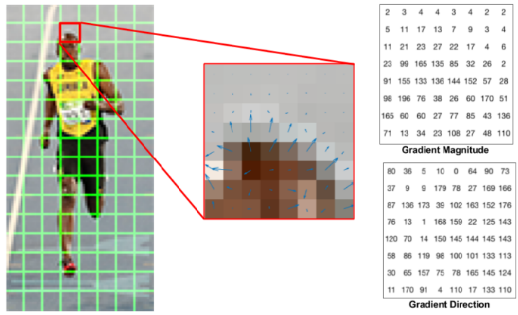

**Original HOG (Histogram of Oriented Gradients):**


* Original HOG looks at how the brightness of pixels changes in different directions across small parts of an image.
*  It's like looking at how edges and textures are oriented in the image, helping us understand shapes and patterns.  

**Modified HOG with Intensity Gradients:**


*   Modified HOG also looks at how the brightness changes, but it focuses more on how strong these changes are rather than their specific directions.
*   It's like paying attention to areas where the brightness changes a lot, regardless of the direction. This helps us notice regions with a lot of contrast or variation in brightness.

Ref : https://learnopencv.com/histogram-of-oriented-gradients/



**Steps**

*   Load MNIST dataset
*   Reshape images for HOG.
* Calculate intensity gradients using Sobel filters.
* Compute histograms of intensity gradients.
* Create and train SVM classifier with standard scaling and linear kernel.
* Predict labels for the test set.
* Calculate evaluation metrics: precision, recall, F1 score, and confusion matrix.

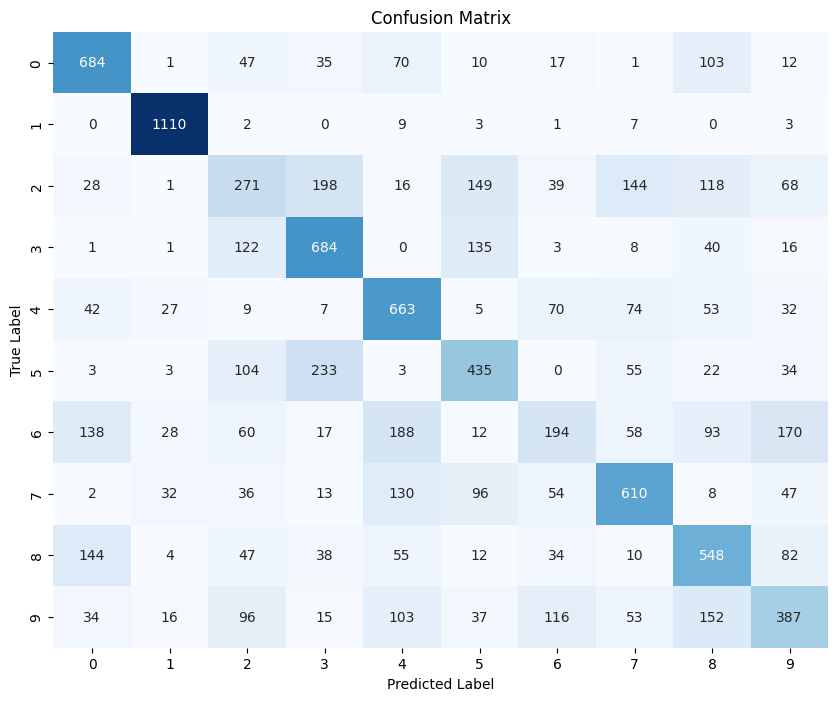

Accuracy: 0.5586
Precision: 0.5417886567162634
Recall: 0.5586
F1 Score: 0.545044318048282
Gradient Calculation and Histogram Computation Time: 20.764556407928467 seconds
Training Time: 195.5908100605011 seconds
Prediction Time: 20.301724910736084 seconds


In [ ]:
# Load MNIST dataset
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Reshape images to fit HOG
# x_train_reshaped = x_train.reshape(-1, 28, 28).astype(np.uint8)
# x_test_reshaped = x_test.reshape(-1, 28, 28).astype(np.uint8)

# Function to calculate intensity gradients
def calculate_intensity_gradients(images):
    intensity_gradients = []
    for image in images:
        gradient_x = filters.sobel_h(image)
        gradient_y = filters.sobel_v(image)
        intensity_gradients.append((gradient_x, gradient_y))
    return intensity_gradients

# Function to compute histograms of intensity gradients
def compute_histograms(gradients):
    histograms = []
    for gradient_x, gradient_y in gradients:
        magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
        orientation = np.arctan2(gradient_y, gradient_x) * 180 / np.pi
        histogram, _ = np.histogram(orientation, bins=9, range=(0, 180), weights=magnitude)
        histograms.append(histogram)
    return np.array(histograms)

# Extract intensity gradients
start_time = time.time()
x_train_gradients = calculate_intensity_gradients(x_train_reshaped)
x_test_gradients = calculate_intensity_gradients(x_test_reshaped)

# Compute histograms of intensity gradients
x_train_histograms = compute_histograms(x_train_gradients)
x_test_histograms = compute_histograms(x_test_gradients)

# Create and train SVM classifier
start_time = time.time()
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_classifier.fit(x_train_histograms, y_train)
training_time = time.time() - start_time

# Predict on test set
start_time = time.time()
y_pred = svm_classifier.predict(x_test_histograms)
prediction_time = time.time() - start_time

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Gradient Calculation and Histogram Computation Time:", time.time() - start_time, "seconds")
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")


**Expriment 3:**


**Steps**

*  Reshape images for HOG.
*  Define HOG parameters.
*  Extract HOG features.
*  Create and train SVM classifier.
*  Predict on the test set.
*  Calculate evaluation metrics: precision, recall, F1 score, and accuracy.


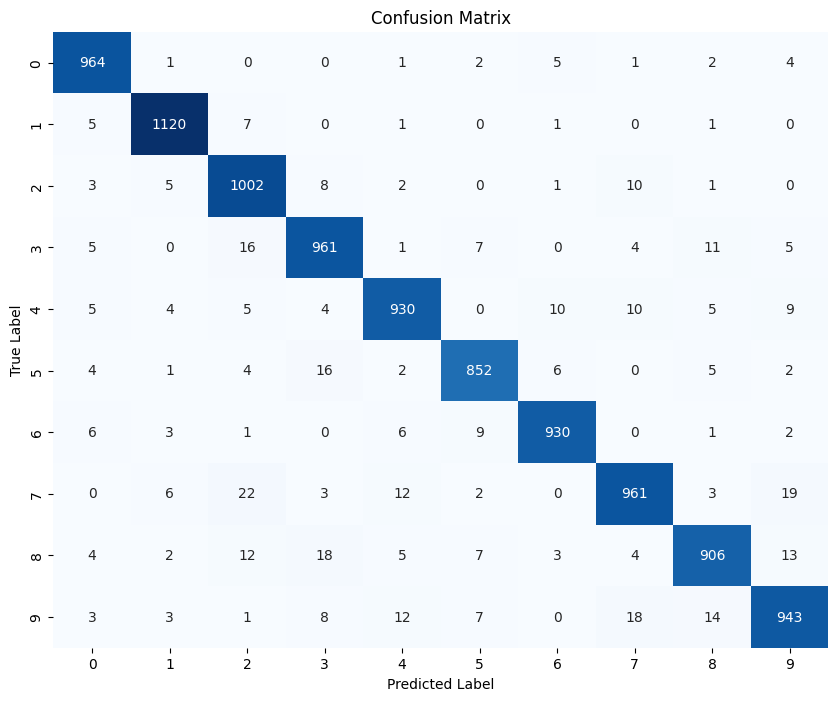

Accuracy: 0.9569
Precision: 0.9569314895431469
Recall: 0.9569
F1 Score: 0.9568393457612432
HOG Extraction Time: 26.056314945220947 seconds
Training Time: 78.36020040512085 seconds
Prediction Time: 5.284986734390259 seconds


In [ ]:
# Load MNIST dataset
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape images to fit HOG
# x_train_reshaped = x_train.reshape(-1, 28, 28).astype(np.uint8)
# x_test_reshaped = x_test.reshape(-1, 28, 28).astype(np.uint8)

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# Function to extract HOG features
def extract_hog_features(images):
    hog_features = []
    for image in images:
        hog_features.append(hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block))
    return np.array(hog_features)

# Extract HOG features
start_time = time.time()
x_train_hog = extract_hog_features(x_train_reshaped)
x_test_hog = extract_hog_features(x_test_reshaped)
hog_extraction_time = time.time() - start_time

# Create and train SVM classifier
start_time = time.time()
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_classifier.fit(x_train_hog, y_train)
training_time = time.time() - start_time

# Predict on test set
start_time = time.time()
y_pred = svm_classifier.predict(x_test_hog)
prediction_time = time.time() - start_time

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print results
print("Accuracy:", accuracy)  # Print accuracy
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("HOG Extraction Time:", hog_extraction_time, "seconds")
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")


**Expriment 4:**


**Step**

1.   Load the MNIST dataset
2.   Extract HOG features from the training data.
3.   Perform clustering on the HOG features to create clusters.
4. Choose representative points (seed points) from each cluster.
5. Create a new training dataset by assigning each training sample to its nearest seed point.
6. Train a model using the new training dataset with fewer data.
7. Test the model with the original test data.



Original size for class 0: 5923
Original size for class 1: 6742
Original size for class 2: 5958
Original size for class 3: 6131
Original size for class 4: 5842
Original size for class 5: 5421
Original size for class 6: 5918
Original size for class 7: 6265
Original size for class 8: 5851
Original size for class 9: 5949
Reduced size for class 0: 100
Reduced size for class 1: 100
Reduced size for class 2: 100
Reduced size for class 3: 100
Reduced size for class 4: 100
Reduced size for class 5: 100
Reduced size for class 6: 100
Reduced size for class 7: 100
Reduced size for class 8: 100
Reduced size for class 9: 100


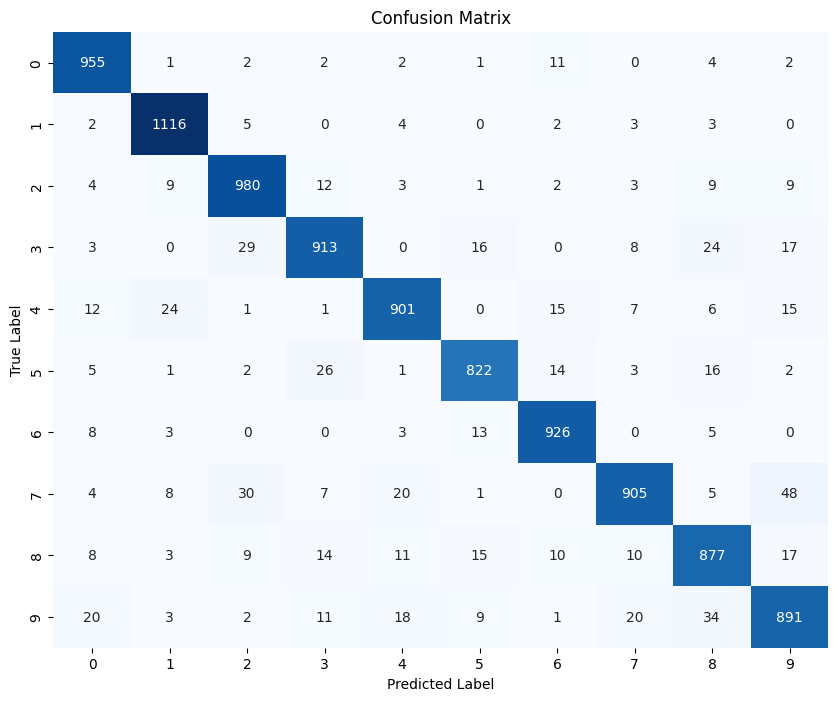

Accuracy: 0.9286
Precision: 0.9285835233942438
Recall: 0.9286
F1 Score: 0.9283561342834346
HOG Extraction Time: 18.397955894470215 seconds
Training Time: 0.03456997871398926 seconds
Prediction Time: 4.035887718200684 seconds


In [ ]:
import numpy as np
from skimage.feature import hog
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import NearestNeighbors
import time

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape images to fit HOG
x_train_reshaped = x_train.reshape(-1, 28, 28).astype(np.uint8)
x_test_reshaped = x_test.reshape(-1, 28, 28).astype(np.uint8)

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# Function to extract HOG features
def extract_hog_features(images):
    hog_features = []
    for image in images:
        hog_features.append(hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block))
    return np.array(hog_features)

# Calculate original sample size for each class
original_sizes = np.zeros(10, dtype=int)
for i in range(10):
    class_size = np.sum(y_train == i)
    original_sizes[i] = class_size
    print(f"Original size for class {i}: {class_size}")

# Extract HOG features from training data
start_time = time.time()
x_train_hog = extract_hog_features(x_train_reshaped)
hog_extraction_time = time.time() - start_time

# Cluster each class separately and choose only the cluster seed points
num_clusters_per_class = 100  # Adjust as needed
seed_points = []
reduced_sizes = np.zeros(10, dtype=int)
for i in range(10):
    # Filter images of current class
    class_indices = np.where(y_train == i)[0]
    class_images = x_train_reshaped[class_indices]

    # Extract HOG features
    class_hog = extract_hog_features(class_images)

    # Perform clustering
    ##kmeans = KMeans(n_clusters=num_clusters_per_class, random_state=42)
    kmeans = KMeans(n_clusters=num_clusters_per_class, n_init=10, random_state=42)
    kmeans.fit(class_hog)

    # Choose cluster seed points
    seed_points.extend(kmeans.cluster_centers_)

    # Calculate reduced sample size for current class
    reduced_sizes[i] = len(kmeans.cluster_centers_)
    print(f"Reduced size for class {i}: {reduced_sizes[i]}")

seed_points = np.array(seed_points)

# Create a new training dataset based on cluster seed points
x_train_new = np.empty((len(seed_points), x_train_hog.shape[1]))
for i, point in enumerate(seed_points):
    # Find nearest neighbor
    dist = np.linalg.norm(x_train_hog - point, axis=1)
    nearest_index = np.argmin(dist)
    x_train_new[i] = x_train_hog[nearest_index]

# Create labels for the cluster seed points based on nearest neighbors from the original dataset
nn = NearestNeighbors(n_neighbors=1)
nn.fit(x_train_hog)
nearest_indices = nn.kneighbors(seed_points, return_distance=False).flatten()
y_train_new = y_train[nearest_indices]

# Train a model using SVM classifier
start_time = time.time()
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train_new, y_train_new)
training_time = time.time() - start_time

# Test the model with the original test data
start_time = time.time()
x_test_hog = extract_hog_features(x_test_reshaped)
y_pred = svm_classifier.predict(x_test_hog)
prediction_time = time.time() - start_time

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("HOG Extraction Time:", hog_extraction_time, "seconds")
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")




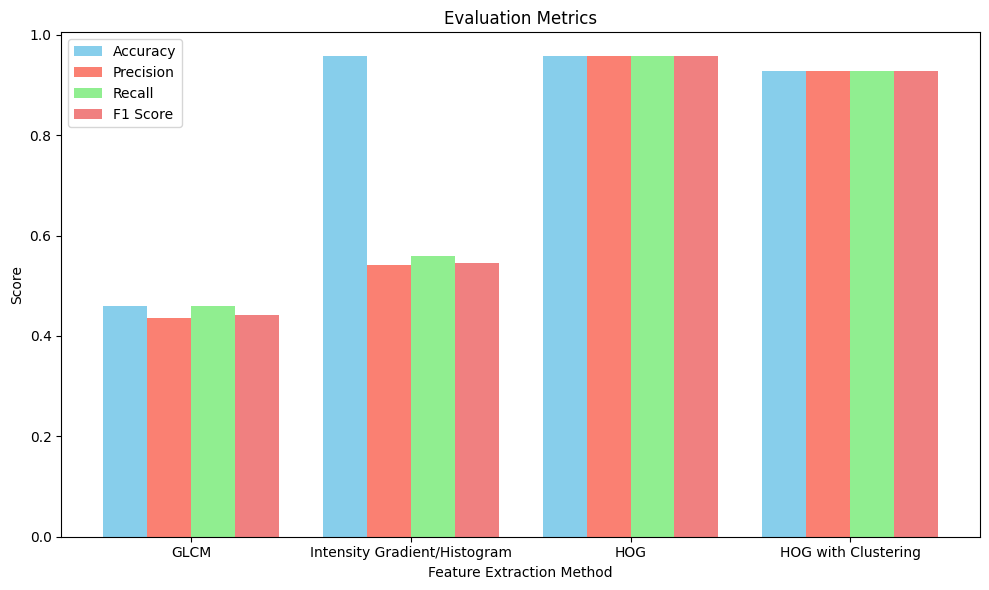

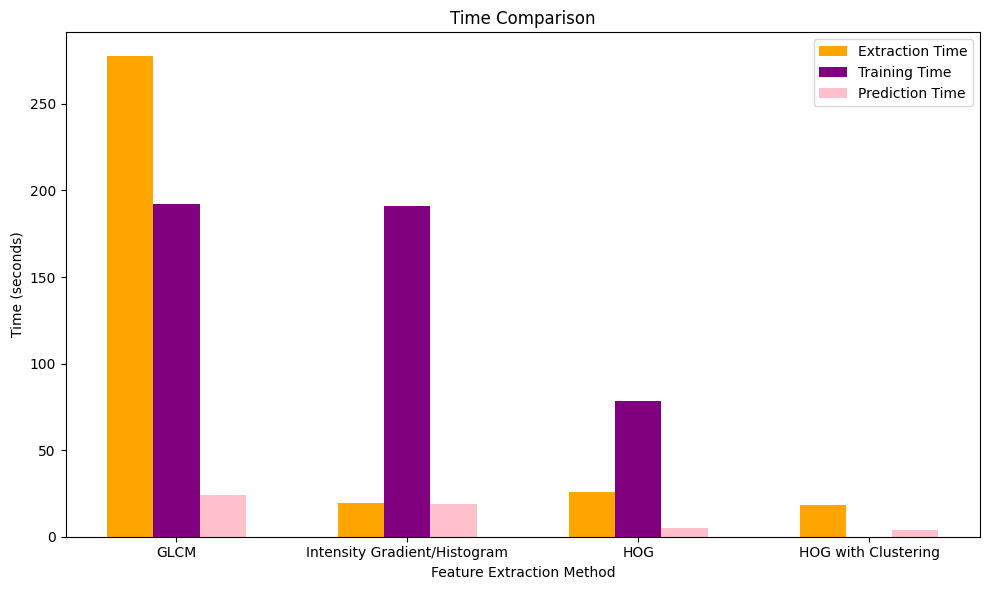

In [ ]:
import numpy as np; import matplotlib.pyplot as plt

# Metrics data
methods = ['GLCM', 'Intensity Gradient/Histogram', 'HOG', 'HOG with Clustering']
accuracy = [0.4601, 0.9569, 0.9569, 0.9286]
precision = [0.4365, 0.5418, 0.9569, 0.9286]
recall = [0.4601, 0.5586, 0.9569, 0.9286]
f1_score = [0.4410, 0.5450, 0.9568, 0.9284]

# Time data (in seconds)
extraction_time = [277.46, 19.44, 26.06, 18.40]
training_time = [192.31, 190.86, 78.36, 0.03]
prediction_time = [24.01, 18.99, 5.28, 4.04]

# Define the width of the bars
bar_width = 0.2
index = np.arange(len(methods))


# Plotting metrics
plt.figure(figsize=(10, 6))  # Medium size

# Accuracy, Precision, Recall, F1 Score
plt.bar(index - bar_width * 1.5, accuracy, bar_width, label='Accuracy', color='skyblue')
plt.bar(index - bar_width * 0.5, precision, bar_width, label='Precision', color='salmon')
plt.bar(index + bar_width * 0.5, recall, bar_width, label='Recall', color='lightgreen')
plt.bar(index + bar_width * 1.5, f1_score, bar_width, label='F1 Score', color='lightcoral')
plt.title('Evaluation Metrics')
plt.xlabel('Feature Extraction Method')
plt.ylabel('Score')
plt.xticks(index, methods)
plt.legend()
plt.tight_layout()
plt.show()


# Plotting time comparison
plt.figure(figsize=(10, 6))  # Medium size

plt.bar(index - bar_width, extraction_time, bar_width, label='Extraction Time', color='orange')
plt.bar(index, training_time, bar_width, label='Training Time', color='purple')
plt.bar(index + bar_width, prediction_time, bar_width, label='Prediction Time', color='pink')
plt.title('Time Comparison')
plt.xlabel('Feature Extraction Method')
plt.ylabel('Time (seconds)')
plt.xticks(index, methods)
plt.legend()
plt.tight_layout()
plt.show()


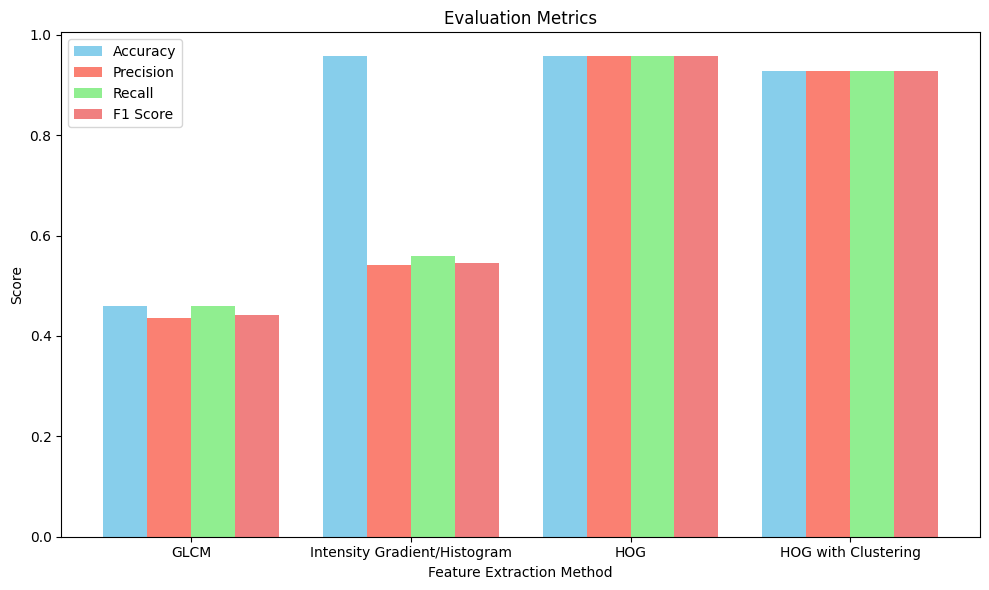

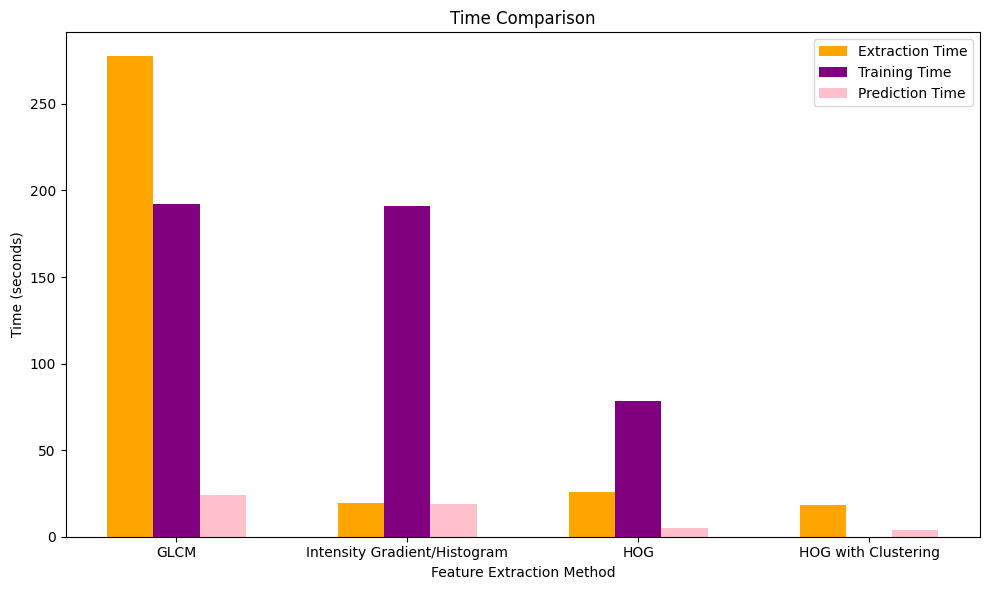

In [ ]:
import numpy as np; import matplotlib.pyplot as plt

# Metrics data
methods = ['GLCM', 'Intensity Gradient/Histogram', 'HOG', 'HOG with Clustering']
accuracy = [0.4601, 0.9569, 0.9569, 0.9286]
precision = [0.4365, 0.5418, 0.9569, 0.9286]
recall = [0.4601, 0.5586, 0.9569, 0.9286]
f1_score = [0.4410, 0.5450, 0.9568, 0.9284]

# Time data (in seconds)
extraction_time = [277.46, 19.44, 26.06, 18.40]
training_time = [192.31, 190.86, 78.36, 0.03]
prediction_time = [24.01, 18.99, 5.28, 4.04]

# Define the width of the bars
bar_width = 0.2
index = np.arange(len(methods))


# Plotting metrics
plt.figure(figsize=(10, 6))  # Medium size

# Accuracy, Precision, Recall, F1 Score
plt.bar(index - bar_width * 1.5, accuracy, bar_width, label='Accuracy', color='skyblue')
plt.bar(index - bar_width * 0.5, precision, bar_width, label='Precision', color='salmon')
plt.bar(index + bar_width * 0.5, recall, bar_width, label='Recall', color='lightgreen')
plt.bar(index + bar_width * 1.5, f1_score, bar_width, label='F1 Score', color='lightcoral')
plt.title('Evaluation Metrics')
plt.xlabel('Feature Extraction Method')
plt.ylabel('Score')
plt.xticks(index, methods)
plt.legend()
plt.tight_layout()
plt.show()


# Plotting time comparison
plt.figure(figsize=(10, 6))  # Medium size

plt.bar(index - bar_width, extraction_time, bar_width, label='Extraction Time', color='orange')
plt.bar(index, training_time, bar_width, label='Training Time', color='purple')
plt.bar(index + bar_width, prediction_time, bar_width, label='Prediction Time', color='pink')
plt.title('Time Comparison')
plt.xlabel('Feature Extraction Method')
plt.ylabel('Time (seconds)')
plt.xticks(index, methods)
plt.legend()
plt.tight_layout()
plt.show()


Referances:






*   https://towardsdatascience.com/glcms-a-great-tool-for-your-ml-arsenal-7a59f1e45b65
*   https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_glcm.html

*  https://learnopencv.com/histogram-of-oriented-gradients/
* Iqbal, N., Mumtaz, R., Shafi, U., & Zaidi, S. M. H. (2021). Gray level co-occurrence matrix (GLCM) texture based crop classification using low altitude remote sensing platforms. PeerJ. Computer science, 7, e536. https://doi.org/10.7717/peerj-cs.536
* https://scikit-learn.org/stable/modules/svm.html
* https://www.spiceworks.com/tech/big-data/articles/what-is-support-vector-machine/
* https://www.youtube.com/watch?v=efR1C6CvhmE